#### Dataset: insurance.csv
#### Context:  
The data contains medical costs of people characterized by certain attributes.

#### Attributes:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high
or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height
to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest.
- charges: Individual medical costs billed by health insurance

### 1. Import the necessary libraries

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import warnings
from scipy.stats import skew, ttest_ind, mannwhitneyu, chisquare
%matplotlib inline
warnings.filterwarnings('ignore')

### 2. Read the Dataset as Dataframe

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. EDA

#### a. shape of the data

In [3]:
pd.DataFrame([[data.shape[0], data.shape[1], data.shape]], columns=["Rows", "Columns", "Shape"])

,Rows,Columns,Shape
0,1338,7,"(1338, 7)"


#### b. Data type of the attribute

In [4]:
pd.DataFrame([[i, j, k] for i, j, k in zip(data.columns, [str(j) for j in data.dtypes] ,[data[i].unique() for i in data.columns])],
             columns=["Name", "dtype", "Catagorical Values"])

,Name,dtype,Catagorical Values
0,age,int64,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2..."
1,sex,object,"[female, male]"
2,bmi,float64,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4..."
3,children,int64,"[0, 1, 3, 2, 5, 4]"
4,smoker,object,"[yes, no]"
5,region,object,"[southwest, southeast, northwest, northeast]"
6,charges,float64,"[16884.924, 1725.5523, 4449.462, 21984.47061, ..."


##### ans:
The following are the variables and their types are confirmed using the dtypes

the datatypes of some columns need to be identified.
by making the datatypes of the smoker, region, children, and sex as Catagorical variables

Numerical:
 - age is discrete
 - charges and bmi are continuous

Catagorical:
 - sex, smoker, region are nominal variables
 - children can be also considered a nominal variable in this sample of data as there are only few catagories 

#### after performing the changes in dtypes

In [54]:
columns = ["sex", "children", "smoker", "region"]
for i in columns:
    data[i] = pd.Categorical(data[i])

pd.DataFrame([[i, j, k] for i, j, k in zip(data.columns, [str(j) for j in data.dtypes] ,[data[i].unique() for i in data.columns])],
             columns=["Name", "dtype", "Catagorical Values"])

,Name,dtype,Catagorical Values
0,age,int64,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2..."
1,sex,category,"[female, male] Categories (2, object): [female..."
2,bmi,float64,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4..."
3,children,category,"[0, 1, 3, 2, 5, 4] Categories (6, int64): [0, ..."
4,smoker,category,"[yes, no] Categories (2, object): [yes, no]"
5,region,category,"[southwest, southeast, northwest, northeast] C..."
6,charges,float64,"[16884.924, 1725.5523, 4449.462, 21984.47061, ..."


#### c. Checking the presence of missing values

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null category
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(4), float64(2), int64(1)
memory usage: 37.2 KB


##### ans:
It seems the data is clean and has no missing values.
investigation of the five point summary can give us more clues as to the missing values but according to info all the columns are non-null entries so there are no missing values. there might be faults in the data entries

#### d. five point summary of numerical attributes

In [95]:
d = data.describe().transpose()
d["IQR"] = d["75%"] - d["25%"]
d["upper bound"] = d["75%"] + 1.5 * d["IQR"]
d["lower bound"] = d["25%"] - 1.5 * d["IQR"]
d

,count,mean,std,min,25%,50%,75%,max,IQR,upper bound,lower bound
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000,24.000000,87.000000,-9.000000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000,8.397500,47.290000,13.700000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801,11899.625365,34489.350562,-13109.150897


##### ans: 
This can be done and mapping the differences of the quartiles gives us a rough eye view of the distribution
judging from this 
- the age is a closely similar to a normal distribution with no outliers
- the bmi and charges have some outliers when the upper bound was calculated.

the data for this removed outliers will be stored and compared further down the analysis

#### e. distribution of bmi, age and charges columns.

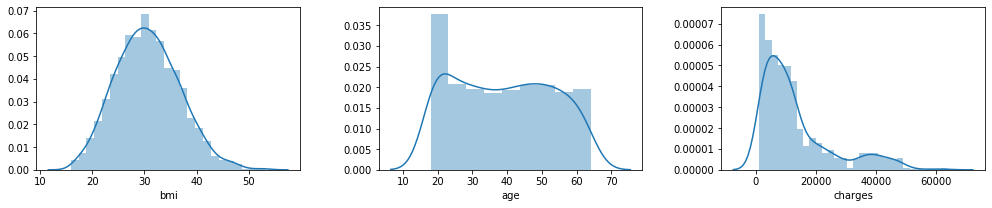

In [61]:
fig = plt.figure(figsize=(17, 3))
fig.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(1, 3, 1)
sns.distplot(data["bmi"], kde=True)

ax = fig.add_subplot(1, 3, 2)
x = data[data["sex"] == "male"]
sns.distplot(x["age"],kde=True)

ax = fig.add_subplot(1, 3, 3)
sns.distplot(data["charges"], kde=True)
plt.show()

##### ans:
subplots are used and each subplot has the distribution for age, bmi, charges
- bmi has a normal distribution nature
- age column has some peaks so there is a chance that the samples cames from two clusters.
- charges also has two peaks so there is a mix of gaussians in this case

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [192]:
pd.DataFrame([[skew(data["bmi"]), skew(data["age"]), skew(data["charges"])]], 
             columns=["BMI", "Age", "Charges"])

,BMI,Age,Charges
0,0.283729,0.05561,1.51418


##### ans:
there are many ways of verifying this but the most elegant way is by using the skew function in scipy.stats
confirms that all the columns are positively skewed

#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

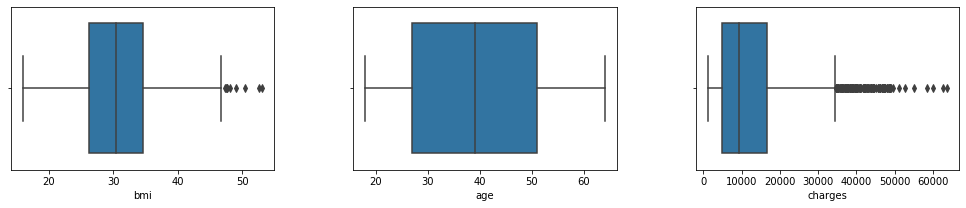

In [193]:
fig = plt.figure(figsize=(17, 3))
fig.subplots_adjust(wspace=0.3)
ax = fig.add_subplot(1, 3, 1)
sns.boxplot(data["bmi"])
ax = fig.add_subplot(1, 3, 2)
sns.boxplot(data["age"])
ax = fig.add_subplot(1, 3, 3)
sns.boxplot(data["charges"])
plt.show()

##### ans:
Here we will decide the outliers using the numerical detection methods

Box plot is a good indicator of data points which can be potential outliers as they are far away from the central value (mean, median).

the bmi and charges columns have data outside the higher whisker so there are numerical outliers in the data

so on a univarient analysis we have the following outliers

a pair plot will help us investigate the outliers on multiple dimensions

#### h. Distribution of categorical columns (including children)

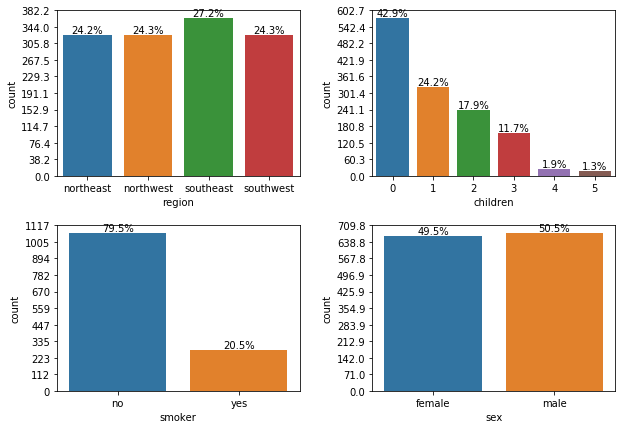

In [122]:
def catplot(data, target):
    ncount = len(data)
    ax = sns.countplot(x=target, data=data)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax = fig.add_subplot(2, 2, 1)
catplot(data, "region")

ax = fig.add_subplot(2, 2, 2)
catplot(data, "children")

ax = fig.add_subplot(2, 2, 3)
catplot(data, "smoker")

ax = fig.add_subplot(2, 2, 4)
catplot(data, "sex")

plt.show()

- The number of smokers is less than the non-smoker
- the sex column is balanced
- the regions are also balanced
- the children is kind of following a pareto distribution

#### i. Pair plot that includes all the columns of the data frame

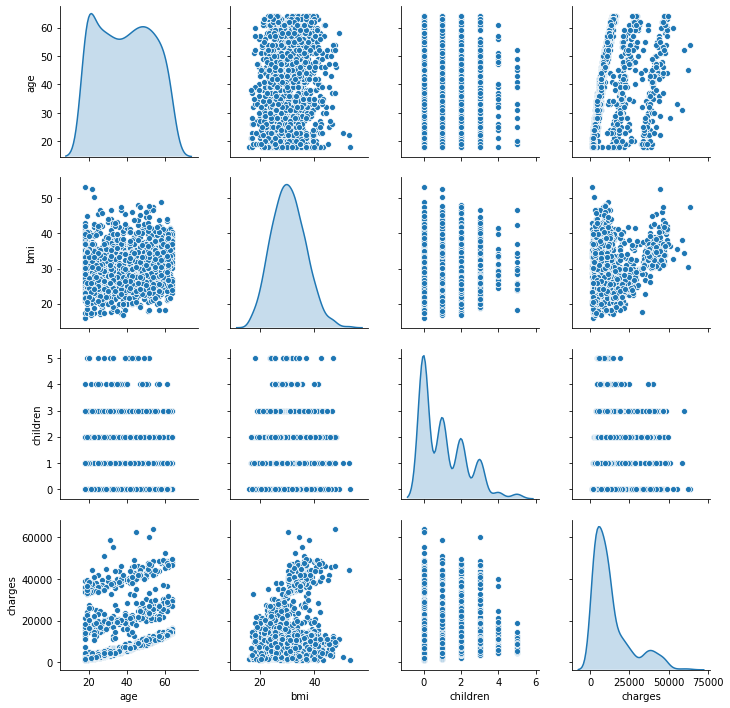

In [65]:
sns.pairplot(data, diag_kind="kde")
plt.show()

- The pairplot clearly indicates presence of outliers in bmi and charges columns
- there are clusters in the charges column (2 to be precise)
- there are clusters in ages column (2 to be precise)

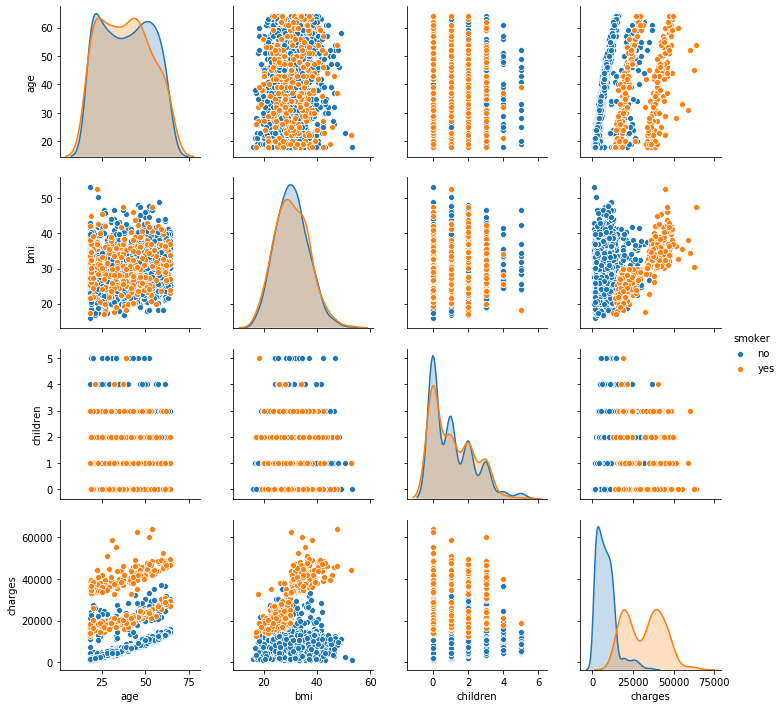

In [194]:
sns.pairplot(data, diag_kind="kde", hue="smoker")
plt.show()

when the data is ploted using smoker as hue we see the charges is made of two different distributions
- one is approximately normal
- other is bimodal in nature
- age is also looking bimodal with 2 peaks
- when we inspect the charges feature for smokers we notice that the charges are bimodal based on the bmi
    - one assumptions can be the smokers who have a average bmi also have insurance charges which are significant due to health deteriotion.
    - one more assumption is obesity is also a factor for charges and the cases with high bmi and smokers need more insurance money to cover the hospital expenses

### 4. Answer the following questions with statistical evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

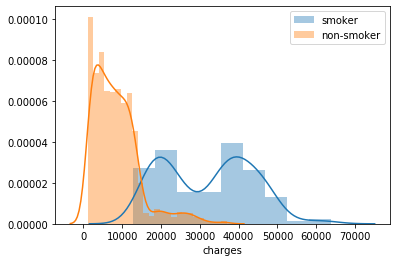

,distributions,statistic,p_value,H0
test name,,,,
shapiro,group1,0.939552,3.625188e-09,reject
shapiro,group2,0.872863,1.445590e-28,reject
t-test,group1 and group2,46.664921,8.271436e-283,reject
mann whitney u test,group1 and group2,7403.000000,2.635117e-130,reject


In [195]:
group1 = data[data["smoker"]== "yes"]["charges"]
group2 = data[data["smoker"]== "no"]["charges"]
sns.distplot(group1, label="smoker")
sns.distplot(group2, label="non-smoker")
plt.legend()
plt.show()

shapiro_statistic, p_value = shapiro(group1)
gs1 = [ "shapiro", "group1", shapiro_statistic, p_value ]

if(p_value > 0.05):
    gs1.append("accept")
else:
    gs1.append("reject")

shapiro_statistic, p_value = shapiro(group2)
gs2 = ["shapiro", "group2", shapiro_statistic, p_value]

if(p_value > 0.05):
    gs2.append("accept")
else:
    gs2.append("reject")


t_statistic, p_value = ttest_ind(group1, group2)
gs3 = ["t-test", "group1 and group2", t_statistic, p_value ]

if(p_value > 0.05):
    gs3.append("accept")
else:
    gs3.append("reject")

t_statistic, p_value = mannwhitneyu(group1, group2)
gs4 = ["mann whitney u test", "group1 and group2", t_statistic, p_value ]

if(p_value > 0.05):
    gs4.append("accept")
else:
    gs4.append("reject")

test = pd.DataFrame([gs1, gs2, gs3, gs4], columns=["test name", "distributions", "statistic", "p_value", "H0"])
test.set_index("test name")

ans:- 
First step is defining the hypothesis:

$H_0:$ there is no significant difference between the smoker and non-smoker class for the charges variable

$H_1:$ there is a significant difference between the smoker and the non-smoker class for the charges variable

the shapiro test is telling us that both the distributions are not normal so applying mann whitney u test will work as its a non parametric case
here the t-test and manwhitnyu test are telling us to 

<b>Reject $H_0$ (reject the null hypothesis)</b> 

so there is a significance difference between the smoker and non-smoker classes of charges variable and its very apparent due to the smokers forming a bimodal distribution.

#### b. Does bmi of males differ significantly from that of females?

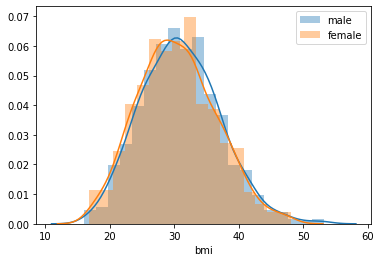

,distributions,statistic,p_value,H0
test name,,,,
shapiro,group1,0.993048,0.003131,reject
shapiro,group2,0.993026,0.003543,reject
t-test,group1 and group2,1.696753,0.089976,accept
mann whitney u test,group1 and group2,212180.000000,0.050701,accept


In [196]:
group1 = data[data["sex"]== "male"]["bmi"]
group2 = data[data["sex"]== "female"]["bmi"]
sns.distplot(group1, label="male")
sns.distplot(group2, label="female")
plt.legend()
plt.show()

shapiro_statistic, p_value = shapiro(group1)
gs1 = [ "shapiro", "group1", shapiro_statistic, p_value ]

if(p_value > 0.05):
    gs1.append("accept")
else:
    gs1.append("reject")

shapiro_statistic, p_value = shapiro(group2)
gs2 = ["shapiro", "group2", shapiro_statistic, p_value]

if(p_value > 0.05):
    gs2.append("accept")
else:
    gs2.append("reject")


t_statistic, p_value = ttest_ind(group1, group2)
gs3 = ["t-test", "group1 and group2", t_statistic, p_value ]

if(p_value > 0.05):
    gs3.append("accept")
else:
    gs3.append("reject")
    
    
t_statistic, p_value = mannwhitneyu(group1, group2)
gs4 = ["mann whitney u test", "group1 and group2", t_statistic, p_value ]

if(p_value > 0.05):
    gs4.append("accept")
else:
    gs4.append("reject")

test = pd.DataFrame([gs1, gs2, gs3, gs4], columns=["test name", "distributions", "statistic", "p_value", "H0"])
test.set_index("test name")

ans:- 
First step is defining the hypothesis:

$H_0:$ there is no significant difference between the male and female class for the bmi variable

$H_1:$ there is a significant difference between the male and the female class for the bmi variable

here the t-test and mann whitney u test are telling us to 

<b>Accept $H_0$ (accept the null hypothesis)</b> 

so there is no significance difference between the male and female classes of bmi variable

#### c. Is the proportion of smokers significantly different in different genders?

In [190]:
from scipy.stats import chisquare
statistic, p_value = chisquare(data[data["smoker"]=="yes"]["sex"].value_counts())
print("statistic: {}, p_value: {}".format(statistic, p_value))
if(p_value > 0.05):
    print("accept H0")
else:
    print("Reject H0")

statistic: 7.065693430656935, p_value: 0.007857389588994759
Reject H0


$H_0:$ There is no significant difference in the proportion of smokers in different genders

$H_1:$ There is a significant difference in the proportion of smokers in different genders

here the chi squared test is telling us to

<b>Reject $H_0$ (reject the null hypothesis)</b> 

so there is a significance difference between the proportion of smokers in different genders

#### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [223]:
filter1 = data[data["sex"] =="female"]
filter2 = filter1[data["children"].cat.codes < 3]
filter2["children"] = pd.to_numeric(filter2["children"])
filter2["children"] = pd.Categorical(filter2["children"])
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm
formula = "bmi ~ C(children)"
model = ols(formula, filter2).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


$H_0:$ The bmi is significantly similar for women with 0, 1, 2 children i.e $\mu_1 = \mu_2 = \mu_3$

$H_1$: The bmi is not significantly similar for women with 0, 1, 2 children i.e $\mu_1 \neq \mu_2 \neq \mu_3$

The anova value 0.715 is greater than 0.05 so this confirms that

<b>Accept $H_0$ (accept the null hypothesis)</b>

The the distribution of bmi across women with 0, 1, 2 children is similar
i.e $\mu_1 = \mu_2 = \mu_3$